In [1]:
# Silencing warnings from scikit-learn
import warnings
warnings.filterwarnings("ignore")

# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection, linear_model, metrics

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y = data['Survived']
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [5]:
num_feat = X.select_dtypes('number').columns.values
cat_feat = X.select_dtypes('object').columns.values
X_num = X[num_feat]
X_cat = X[cat_feat]

In [6]:
X_num = (X_num - X_num.mean()) / X_num.std()
X_num = X_num.fillna(X_num.mean())
X_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.826913,-0.530005,0.432550,-0.473408,-0.502163
1,-1.565228,0.571430,0.432550,-0.473408,0.786404
2,0.826913,-0.254646,-0.474279,-0.473408,-0.488580
3,-1.565228,0.364911,0.432550,-0.473408,0.420494
4,0.826913,0.364911,-0.474279,-0.473408,-0.486064


In [10]:
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [13]:
X = pd.concat([X_num, X_cat], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.826913,-0.530005,0.432550,-0.473408,-0.502163,0,1,0,0,1
1,-1.565228,0.571430,0.432550,-0.473408,0.786404,1,0,1,0,0
2,0.826913,-0.254646,-0.474279,-0.473408,-0.488580,1,0,0,0,1
3,-1.565228,0.364911,0.432550,-0.473408,0.420494,1,0,0,0,1
4,0.826913,0.364911,-0.474279,-0.473408,-0.486064,0,1,0,0,1


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

In [15]:
# Fitting the model and printing the accuracy score
model = linear_model.SGDClassifier(loss='log', max_iter=2000, random_state=0) # Random state is fixed for reproducibility
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7847533632286996

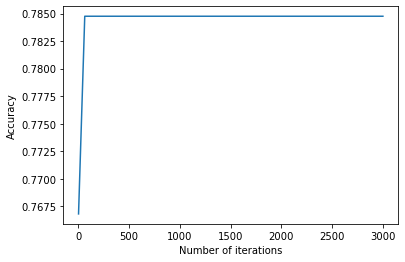

In [16]:
n_iter = np.linspace(1, 3000)
scores = np.array([])
for n in n_iter:
    model = linear_model.SGDClassifier(loss='log', max_iter=n, random_state=0)
    model.fit(X_train, y_train)
    scores = np.append(scores, model.score(X_test, y_test))
    
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[122,  17],
       [ 31,  53]])

In [18]:
metrics.precision_score(y_test, y_pred)

0.7571428571428571

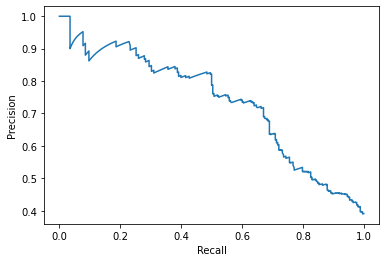

In [19]:
y_proba_train = model.predict_proba(X_train)[:, 1]
p, r, t = metrics.precision_recall_curve(y_train, y_proba_train)

plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [20]:
prt = np.array(list(zip(p, r, t)))
prt_df = pd.DataFrame(data=prt, columns=['Precision', 'Recall', 'Threshold'])
prt_df.tail()

,Precision,Recall,Threshold
572,1.0,0.019380,0.996545
573,1.0,0.015504,0.997022
574,1.0,0.011628,0.997339
575,1.0,0.007752,0.997619
576,1.0,0.003876,0.998481


In [21]:
y_proba_test = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba_test >= 0.973211).astype(int)
np.count_nonzero(y_pred)

19

In [22]:
prt_df.tail(50)

,Precision,Recall,Threshold
527,0.921569,0.182171,0.962464
528,0.920000,0.178295,0.963119
529,0.918367,0.174419,0.963334
530,0.916667,0.170543,0.965411
531,0.914894,0.166667,0.966656
532,0.913043,0.162791,0.969153
533,0.911111,0.158915,0.969405
534,0.909091,0.155039,0.970084
535,0.906977,0.151163,0.973054
536,0.904762,0.147287,0.974429


In [23]:
y_proba_test = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba_test >= 0.932465).astype(int)
np.count_nonzero(y_pred)

28

In [24]:
yy = np.array(list(zip(y_test, y_proba_test)))
indices = np.where(yy[:,1] >= 0.932465)
yy[indices]

array([[1.        , 0.98359968],
       [1.        , 0.97143829],
       [1.        , 0.99662966],
       [0.        , 0.96910981],
       [1.        , 0.93425762],
       [1.        , 0.99057829],
       [1.        , 0.97250975],
       [1.        , 0.99109591],
       [1.        , 0.99404121],
       [1.        , 0.99241167],
       [1.        , 0.99030152],
       [1.        , 0.95651113],
       [1.        , 0.99871585],
       [0.        , 0.96661713],
       [1.        , 0.94934309],
       [0.        , 0.98121472],
       [1.        , 0.9965976 ],
       [1.        , 0.99420812],
       [1.        , 0.99494357],
       [1.        , 0.97666636],
       [1.        , 0.99250987],
       [1.        , 0.98361549],
       [1.        , 0.98825487],
       [1.        , 0.98730925],
       [0.        , 0.98472986],
       [1.        , 0.9905125 ],
       [1.        , 0.95133968],
       [1.        , 0.97122418]])